In [1]:
import os 
import sys 
import time 
import numpy as np
import json
import ../tpch_training as tp 

SyntaxError: invalid syntax (537413204.py, line 6)

In [ ]:
DET_PARAMS_FNAME = "./training_params/detparams_n10.json"
DET_PARAMS = None
with open(DET_PARAMS_FNAME, 'rb') as f:
    DET_PARAMS = json.load(f)
    print(len(DET_PARAMS))

training_fnames = ['./training_results/'+x for x in os.listdir('./training_results') if 'txt' in x and 'n10_det' in x]
len(training_fnames)
print(training_fnames)

def get_spark_params(result_dict):
    param_vals = []
    for param in tp.SPARK_PARAMETERS:
        for p in result_dict['params']:
            if p['name'] == param['name']:
                param_vals.append(p['cur_value'])
    return tuple(param_vals)

In [3]:
defaults = tuple(a['default_value'] for a in tp.SPARK_PARAMETERS)
defaults

(1,
 '1g',
 2,
 1,
 '1g',
 '48m',
 'true',
 'true',
 '32k',
 '4m',
 'true',
 0.6,
 '128',
 'false',
 'lz4',
 1,
 200,
 200,
 0.5)

In [4]:
fname_numdata = {}
fname_numdet = {}
deterministic_data = {}

for fname in training_fnames:
    with open(fname,'r') as file:
        lines = file.readlines()
        fname_numdata[fname] = len(lines)
        deterministic_data[fname] = {}
        
        for k in DET_PARAMS:
            if int(k) < len(lines):
                deterministic_data[fname][k] = eval(lines[int(k)])
        fname_numdet[fname] = len(deterministic_data[fname])
        if fname_numdet[fname] < 5:
            del fname_numdet[fname]
            del deterministic_data[fname]
            
print(sum(fname_numdata.values()))
print(fname_numdata)
print(fname_numdet)

76963
{'./training_results/sf324_n250_rand_hoped_main_0.txt': 4175, './training_results/sf324_n250_rand_hoped_main_1.txt': 4437, './training_results/sf324_n250_rand_hoped_main_11.txt': 4361, './training_results/sf324_n250_rand_hoped_main_12.txt': 4422, './training_results/sf324_n250_rand_hoped_main_13.txt': 4468, './training_results/sf324_n250_rand_hoped_main_14.txt': 4258, './training_results/sf324_n250_rand_hoped_main_15.txt': 2711, './training_results/sf324_n250_rand_hoped_main_2.txt': 4568, './training_results/sf324_n250_rand_hoped_main_3.txt': 4640, './training_results/sf324_n250_rand_hoped_main_4.txt': 4932, './training_results/sf324_n250_rand_hoped_main_5.txt': 5483, './training_results/sf324_n250_rand_hoped_main_6.txt': 5017, './training_results/sf324_n250_rand_main_log_rand_10.txt': 5072, './training_results/sf324_n250_rand_main_log_rand_6.txt': 3842, './training_results/sf324_n250_rand_main_log_rand_7.txt': 5064, './training_results/sf324_n250_rand_main_log_rand_9.txt': 5156,

In [5]:
det_params = {}
det_rt = {}
for fname, data in deterministic_data.items():
    det_params[fname] = []
    det_rt[fname] = []
    for result_dict in data.values():
        det_params[fname].append(get_spark_params(result_dict))
        if result_dict['runtimes']:
            det_rt[fname].append(result_dict['runtimes']['total'])
    if not det_params[fname]:
        print(fname)
        del det_params[fname]
        del det_rt[fname]
prev_fname = fname
for fname in det_params:
    assert 'det' not in fname or det_params[fname][0] == defaults, f'{det_params[fname][0]} !=\n{defaults}'
    #assert str(det_params[fname]) == str(det_params[prev_fname]), fname + " " + prev_fname
    print(fname, '\n',det_rt[fname][0], det_rt[fname][-1], max(det_rt[fname]), min(det_rt[fname]), len(det_rt[fname]))

./training_results/sf324_n250_rand_hoped_main_0.txt 
 61.08933448791504 48.82856845855713 80.75651168823242 46.15500092506409 835
./training_results/sf324_n250_rand_hoped_main_1.txt 
 59.970102310180664 52.73853778839111 80.49841380119324 44.99124050140381 811
./training_results/sf324_n250_rand_hoped_main_11.txt 
 56.310324907302856 40.98875427246094 86.83520102500916 37.73866605758667 829
./training_results/sf324_n250_rand_hoped_main_12.txt 
 64.1507351398468 51.904479026794434 81.56371402740479 44.082831382751465 819
./training_results/sf324_n250_rand_hoped_main_13.txt 
 54.48541283607483 79.92557382583618 132.29344725608826 46.88082981109619 644
./training_results/sf324_n250_rand_hoped_main_14.txt 
 92.19421005249023 46.52645659446716 110.33271908760071 44.16247534751892 637
./training_results/sf324_n250_rand_hoped_main_15.txt 
 56.62828040122986 50.05165195465088 68.40103101730347 45.46117877960205 824
./training_results/sf324_n250_rand_hoped_main_2.txt 
 62.3434693813324 57.385857

In [6]:
# how many different param combos have we tried?
fname_num_params = {}
fname_valid = {}
for fname in training_fnames:
    with open(fname,'r') as file:
        lines = file.readlines()
        fname_num_params[fname] = set()
        fname_valid[fname] = 0
        for result_dict in lines:
            result_dict = eval(result_dict)
            fname_num_params[fname].add(get_spark_params(result_dict))
            fname_valid[fname] += 1 if result_dict['runtimes'] else 0


In [7]:
print(sum([len(x) for x in fname_num_params.values()]))
for fname, vals in fname_num_params.items():
    print(fname[18:60], '\nnum unique params', len(vals), 'total runs',fname_numdata[fname] , 'valid runs', fname_valid[fname])

75379
/sf324_n250_rand_hoped_main_0.txt 
num unique params 4175 total runs 4175 valid runs 3749
/sf324_n250_rand_hoped_main_1.txt 
num unique params 4437 total runs 4437 valid runs 3839
/sf324_n250_rand_hoped_main_11.txt 
num unique params 4361 total runs 4361 valid runs 3911
/sf324_n250_rand_hoped_main_12.txt 
num unique params 4422 total runs 4422 valid runs 4147
/sf324_n250_rand_hoped_main_13.txt 
num unique params 4468 total runs 4468 valid runs 3775
/sf324_n250_rand_hoped_main_14.txt 
num unique params 4258 total runs 4258 valid runs 3400
/sf324_n250_rand_hoped_main_15.txt 
num unique params 2711 total runs 2711 valid runs 2253
/sf324_n250_rand_hoped_main_2.txt 
num unique params 4568 total runs 4568 valid runs 4256
/sf324_n250_rand_hoped_main_3.txt 
num unique params 4640 total runs 4640 valid runs 4352
/sf324_n250_rand_hoped_main_4.txt 
num unique params 4932 total runs 4932 valid runs 4621
/sf324_n250_rand_hoped_main_5.txt 
num unique params 5483 total runs 5483 valid runs 4603

In [8]:
#det_rt

In [9]:
for fname in det_rt:
    all_runs = []
    runs = []
    for run in det_rt[fname]:
        all_runs.append(run)
        runs.append(run)
    print(fname, 'avg ', round(np.average(runs), 5), 'median', round(np.median(runs), 5), 'range ', round(max(runs)-min(runs),5), 'std ', round(np.std(runs), 5))
print('overall runs avg ', round(np.average(all_runs), 5), 'median', round(np.median(all_runs), 5), 'range ', round(max(all_runs)-min(all_runs),5), 'std ', round(np.std(all_runs), 5))
              
        

./training_results/sf324_n250_rand_hoped_main_0.txt avg  60.77782 median 60.06207 range  34.60151 std  5.73982
./training_results/sf324_n250_rand_hoped_main_1.txt avg  57.21007 median 51.31363 range  35.50717 std  9.95247
./training_results/sf324_n250_rand_hoped_main_11.txt avg  55.18473 median 56.49336 range  49.09653 std  6.16166
./training_results/sf324_n250_rand_hoped_main_12.txt avg  55.9441 median 56.42838 range  37.48088 std  7.76072
./training_results/sf324_n250_rand_hoped_main_13.txt avg  68.85199 median 60.39692 range  85.41262 std  18.51675
./training_results/sf324_n250_rand_hoped_main_14.txt avg  65.93758 median 56.00954 range  66.17024 std  20.26328
./training_results/sf324_n250_rand_hoped_main_15.txt avg  53.10954 median 51.02271 range  22.93985 std  5.718
./training_results/sf324_n250_rand_hoped_main_2.txt avg  60.01686 median 59.44933 range  46.49535 std  5.44719
./training_results/sf324_n250_rand_hoped_main_3.txt avg  51.44427 median 51.19209 range  21.79551 std  3.731

['sf10_det_test_log_det.txt', '.ipynb_checkpoints', 'sf10_rand_test_logging_rand.txt', 'sf10_det_test_logging.txt', 'sf10_det_main_det.txt', 'sf324_det_test_big_log_det.txt', 'sf10_n10_det_test_det_log.txt', 'sf10_n10_rand_test_rand.txt', 'sf10_n500_det_main_det.txt', 'sf10_n1_rand_rand_test.txt', 'sf10_n2_rand_rand_test.txt', 'sf324_det_main_log_det.txt', 'sf324_n1_det_main_det_1.txt', 'sf324_n250_rand_hoped_main_0.txt', 'sf324_n250_rand_hoped_main_1.txt', 'sf324_n250_rand_hoped_main_11.txt', 'sf324_n250_rand_hoped_main_12.txt', 'sf324_n250_rand_hoped_main_13.txt', 'sf324_n250_rand_hoped_main_14.txt', 'sf324_n250_rand_hoped_main_15.txt', 'sf324_n250_rand_hoped_main_2.txt', 'sf324_n250_rand_hoped_main_3.txt', 'sf324_n250_rand_hoped_main_4.txt', 'sf324_n250_rand_hoped_main_5.txt', 'sf324_n250_rand_hoped_main_6.txt', 'sf324_n250_rand_main_log_rand_10.txt', 'sf324_n250_rand_main_log_rand_6.txt', 'sf324_n250_rand_main_log_rand_7.txt', 'sf324_n250_rand_main_log_rand_9.txt', 'sf324_rand_hope

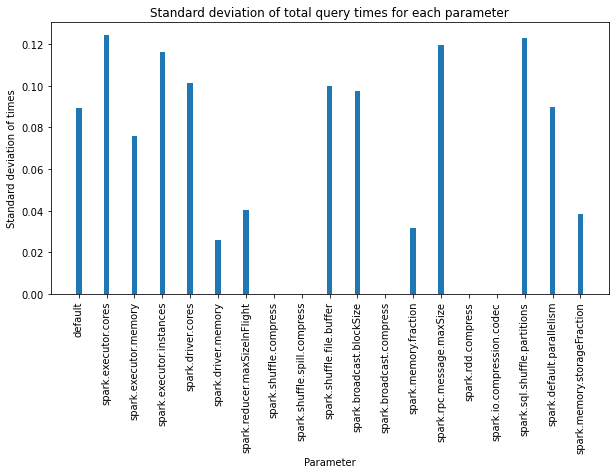

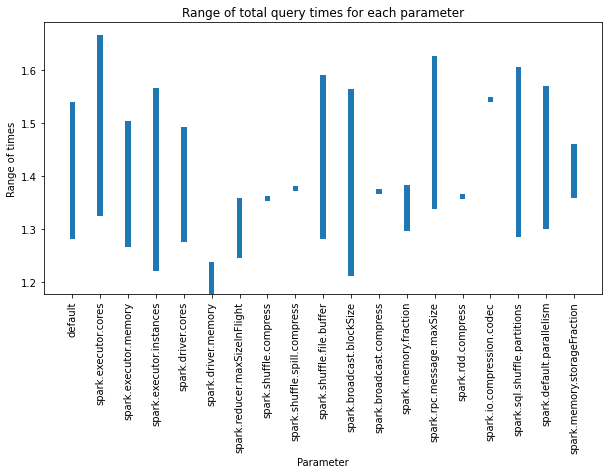

deftotal [69.89695191383362, 76.55949521064758, 67.18906092643738, 83.25056529045105, 68.55104565620422, 66.98108506202698, 82.53521203994751, 65.68294048309326, 79.35534143447876, 67.5759801864624]
default, min: 65.68294, max: 83.25057, median 69.224, avg: 72.75777  default: (65.68294, 83.25057)
sf10_det_main_det 532


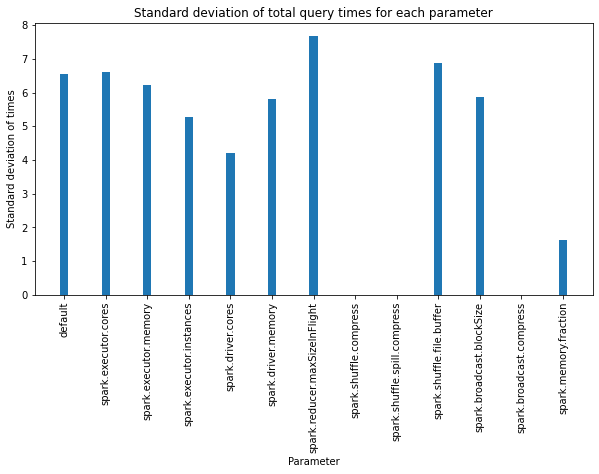

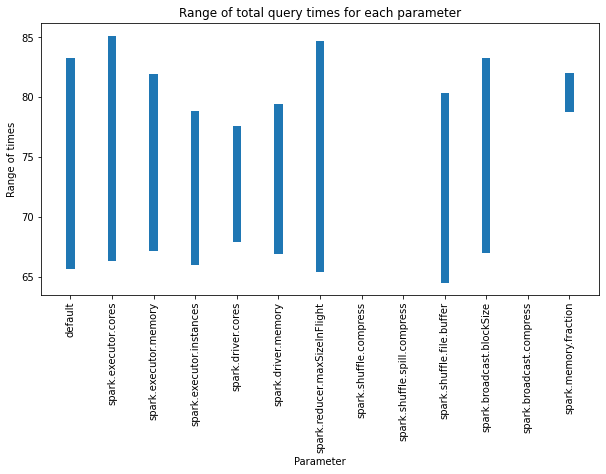

deftotal [2.104457139968872, 1.965604543685913, 1.7544336318969727, 2.1981308460235596, 2.0460996627807617, 1.8441500663757324, 2.003819227218628, 2.0407001972198486, 1.817453145980835, 1.8633522987365723]
default, min: 1.75443, max: 2.19813, median 1.98471, avg: 1.96382  default: (1.75443, 2.19813)
sf324_det_test_big_log_det 880


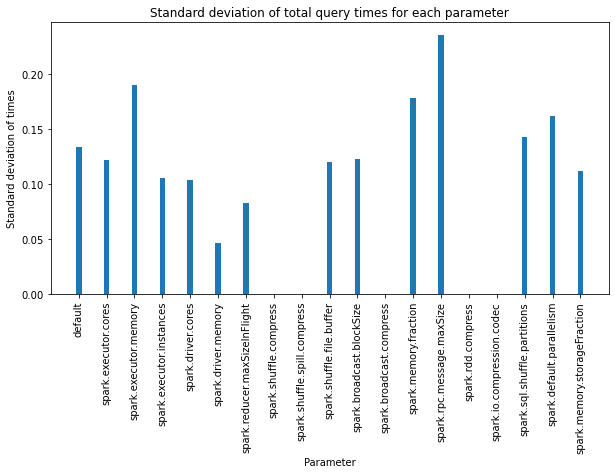

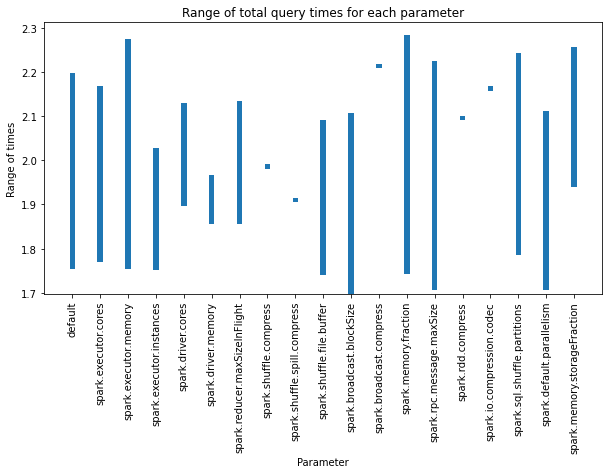

deftotal [86.09628748893738, 104.46121215820312, 102.80109524726868, 105.16580533981323, 86.89985251426697, 86.51225900650024, 104.272616147995, 107.12016105651855, 86.86610245704651, 84.72832870483398]
default, min: 84.72833, max: 107.12016, median 94.85047, avg: 95.49237  default: (84.72833, 107.12016)
sf10_n500_det_main_det 880


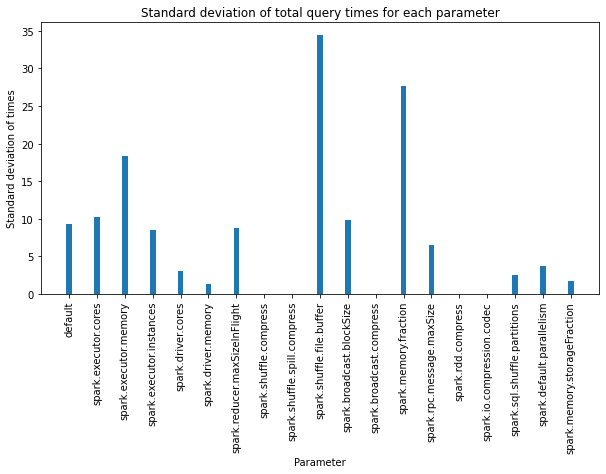

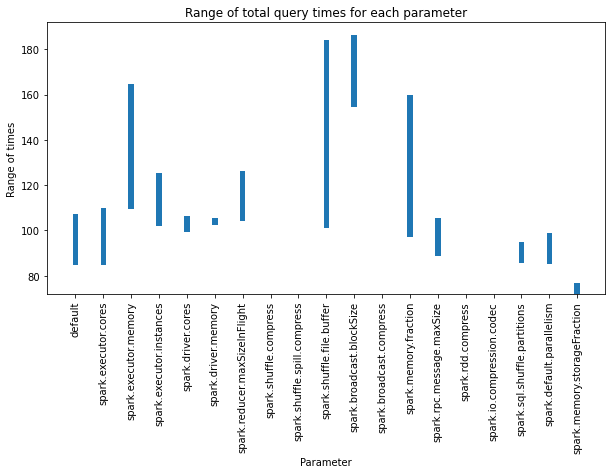

deftotal [70.16923189163208, 56.09674549102783, 57.24664092063904, 57.446571350097656, 55.270750284194946, 59.011982917785645, 63.20668339729309, 63.91327953338623, 55.398761510849, 57.34626507759094]
default, min: 55.27075, max: 70.16923, median 57.39642, avg: 59.51069  default: (55.27075, 70.16923)
sf324_det_main_log_det 105


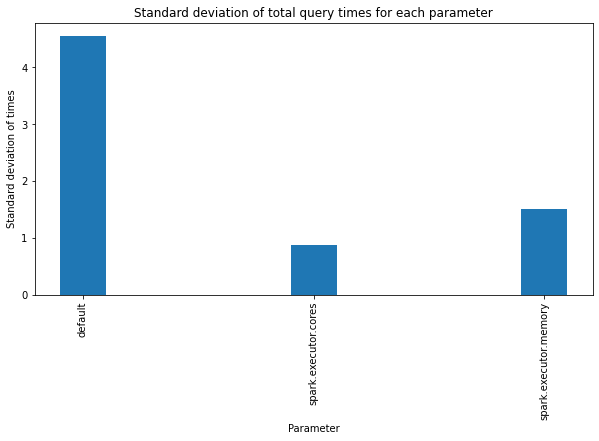

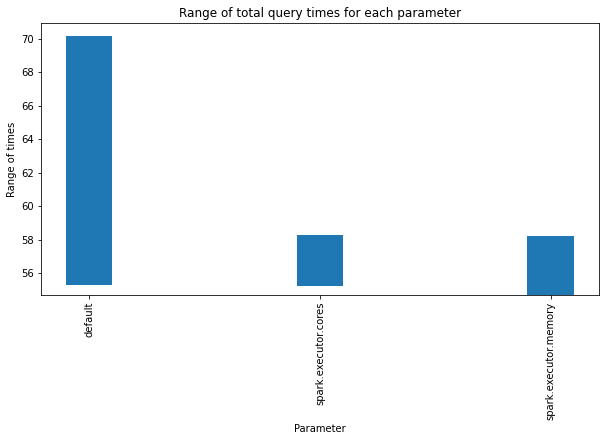

deftotal [3.066098928451538, 3.096679210662842, 3.2435574531555176, 3.0772461891174316, 3.0145881175994873, 3.0391342639923096, 3.0188679695129395, 3.1691300868988037, 3.0710301399230957, 3.214452028274536]
default, min: 3.01459, max: 3.24356, median 3.07414, avg: 3.10108  default: (3.01459, 3.24356)
sf324_n1_det_main_det_1 880


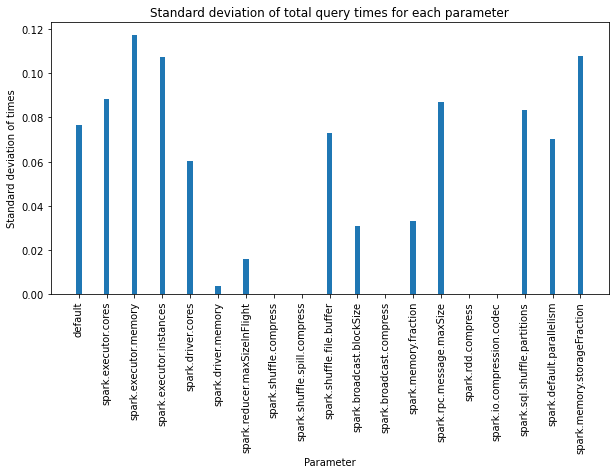

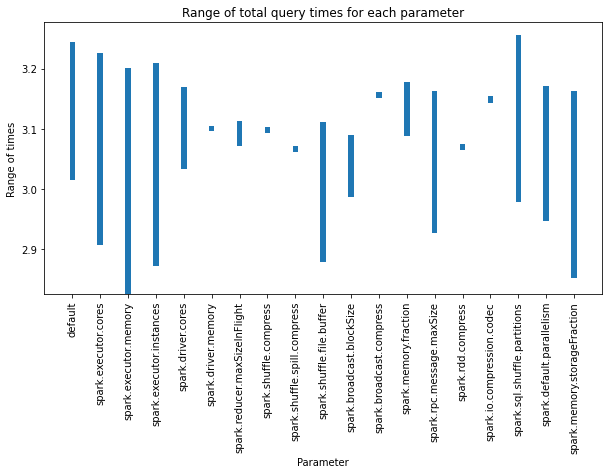

deftotal [2.066568613052368, 1.8650715351104736, 1.8460991382598877, 2.188267707824707, 1.9461617469787598, 2.148590326309204, 1.9488413333892822, 2.0266685485839844, 1.9857561588287354, 1.8485047817230225]
default, min: 1.8461, max: 2.18827, median 1.9673, avg: 1.98705  default: (1.8461, 2.18827)
sf324_n1_det_main_n1 880


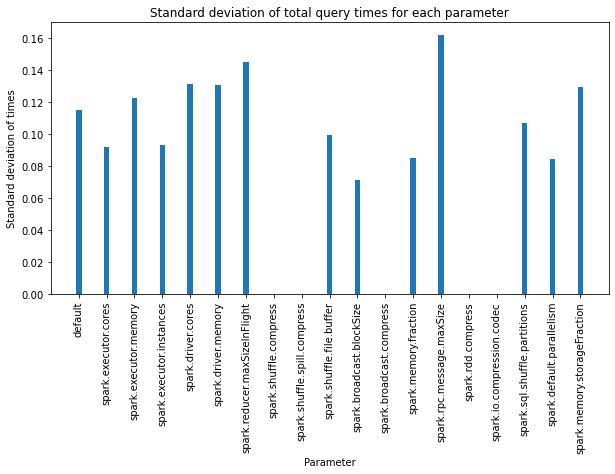

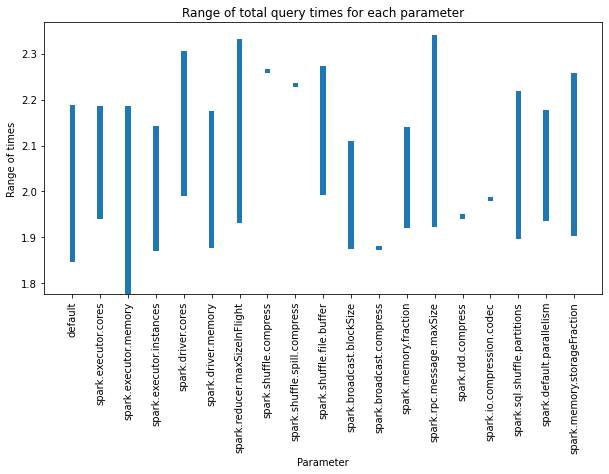

deftotal [41.02034282684326, 38.07248139381409, 37.22033619880676, 40.447455167770386, 38.12436628341675, 40.188958406448364, 39.06622576713562, 38.21741771697998, 37.72713851928711, 37.53149056434631]
default, min: 37.22034, max: 41.02034, median 38.17089, avg: 38.76162  default: (37.22034, 41.02034)
sf324_n250_det_hoped_main_250 880


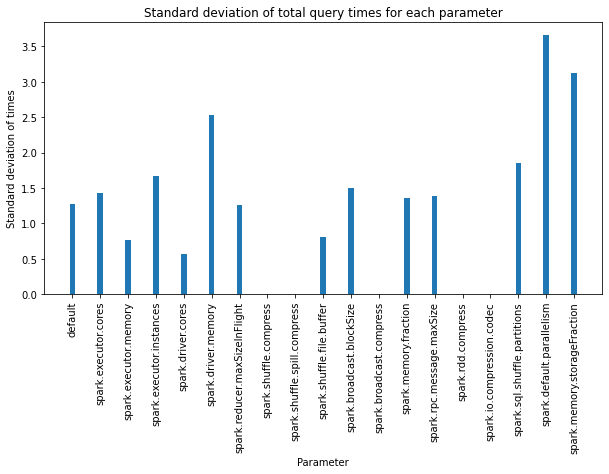

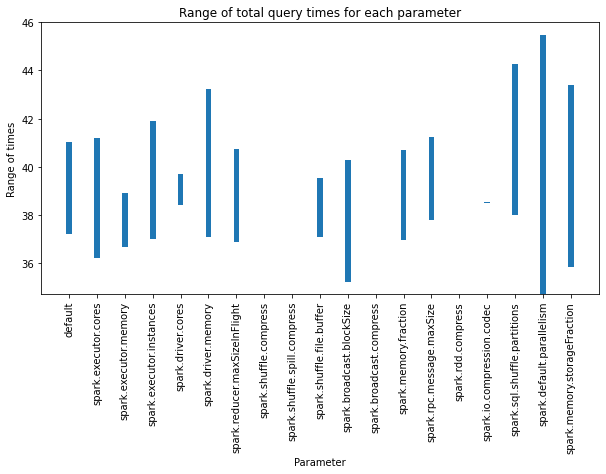

deftotal [40.339301347732544, 38.84388566017151, 37.90048885345459, 38.67539167404175, 37.92604637145996, 40.2809841632843, 39.33601117134094, 37.4643440246582, 39.696574211120605, 38.989208698272705]
default, min: 37.46434, max: 40.3393, median 38.91655, avg: 38.94522  default: (37.46434, 40.3393)
sf324_n250_det_main_n250 880


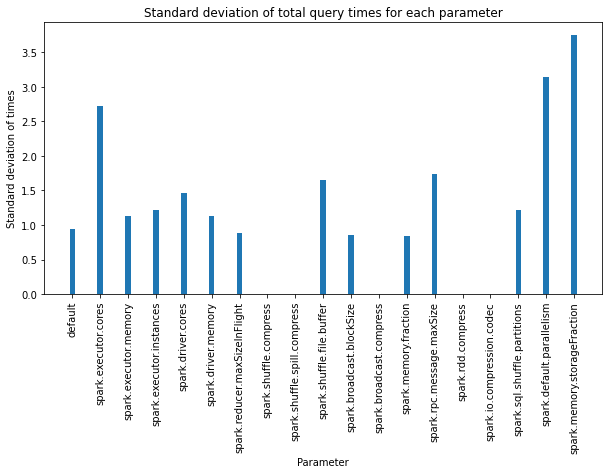

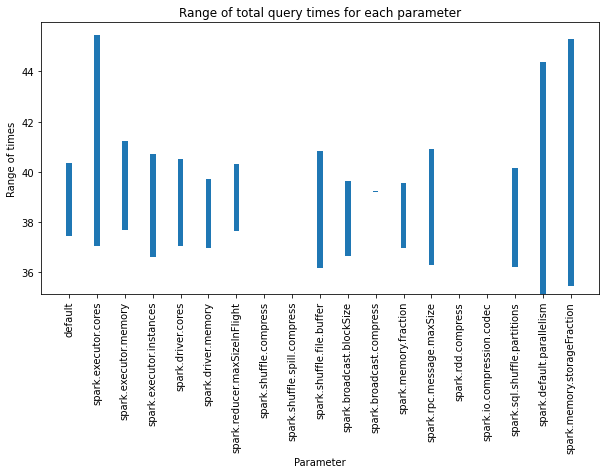

In [10]:
#training_fnames = ['./training_results/'+x for x in os.listdir('./training_results') if 'json' in x and 'test_clear_ports' in x]
#direc = '../../../../nobackup1/hoped/spark-autotuner/training_data/training_results'
#training_fnames = [f'{direc}/{x}'for x in os.listdir(direc) if 'json' in x and 'nobackup_deterministic_raw_runtimes' in x]
direc = './training_results'
print (os.listdir(direc), "\n")
training_fnames = [f'{direc}/{x}'for x in os.listdir(direc) if 'txt' in x and 'det' in x]
#direc = '../../../../nobackup1/hoped/spark-autotuner/training_data/training_results'

len(training_fnames)
print(training_fnames)
for FNAME in  training_fnames:
    import json
    import os
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    
    with open(FNAME,'r') as file:
        try:
            file_data = file.readlines()
        except Exception as e:
            print(FNAME, "load error")
            print(e)
            continue
    if len(file_data) < 5:
        continue

    class Parameter:
        def __init__(self, name):
            self.name = name
            self.val_to_results = {}

        def add(self, param_val, results):
            self.val_to_results[param_val] = results

        def get_total(self, param_val):
            if param_val in self.val_to_results:
                return self.val_to_results[param_val]["total"]

        def get_param_vals(self):
            return set(self.val_to_results.keys())

    param_name_to_param_obj = {}

    def populate_params():
        #analyze one file

        with open(FNAME, "r") as file:
            for line in file:
                d = eval(line)
       
                params = [p for p in d["params"] if p['spark_param']]
                runtimes = d["runtimes"]
                if len(runtimes) == 0:
                    continue

                all_default = True
                for p in params:
                    if str(p['cur_value']) != str(p['default_value']):
                        varying_param = p['name']
                        all_default = False
                        break
                if all_default:
                    if 'default' not in param_name_to_param_obj:
                        param_name_to_param_obj["default"] = Parameter('default')

                    obj = param_name_to_param_obj["default"]
                    obj.add(len(obj.val_to_results), runtimes)
                    continue

                if varying_param not in param_name_to_param_obj:
                    param_name_to_param_obj[varying_param] = Parameter(varying_param)
                obj = param_name_to_param_obj[varying_param]
                assert "total" in runtimes
                obj.add(p['cur_value'], runtimes)

    def analyze_results():
        populate_params()
        default = param_name_to_param_obj["default"]
        default_total = [default.get_total(k) for k in default.get_param_vals()]
        print('deftotal',default_total)
        mins = []
        names = []
        diffs = []
        stds = []
        for p in param_name_to_param_obj:
            min_runtime = float("inf")
            max_runtime = -float("inf")
            times = []
            if p != 'default':
                obj = param_name_to_param_obj[p]
                for k in obj.get_param_vals():
                    total_time = obj.get_total(k)
                    if type(total_time) == list:
                        times.extend(total_time)
                        min_runtime = min(min_runtime, min(total_time))
                        max_runtime = max(max_runtime, max(total_time))
                    else:
                        times.append(total_time)
                        min_runtime = min(min_runtime, total_time)
                        max_runtime = max(max_runtime, total_time)
                if min_runtime == max_runtime:
                    max_runtime += .01


            else:
                times.extend(default_total)
                min_runtime = min(default_total)
                max_runtime = max(default_total)
            stds.append(np.std(times))
            if p == 'default':
                print(f"{p}, min: {round(min_runtime,5)}, max: {round(max_runtime,5)}, median {round(np.median(times),5)}, avg: {round(np.average(times),5)}  default: {round(min(default_total),5), round(max(default_total),5)}")
            mins.append(min_runtime)
            diffs.append(max_runtime - min_runtime)
            names.append(p)

        #save total time std to csv
        df = pd.DataFrame(list(zip(names, stds)),
        columns =['name', 'standard_dev_total_times'])
        df.to_csv("./training_sensitivity/all_runtime_stds.csv", mode='w')

        #plot std
        fig = plt.figure(figsize = (10, 5))
        plt.xticks(rotation=90)
        plt.bar(names, stds, bottom=[0]*len(names), width=0.2)
        plt.title("Standard deviation of total query times for each parameter")
        plt.xlabel("Parameter")
        plt.ylabel("Standard deviation of times")
        name = FNAME.split("/")[-1][:-4]
        print(name, len(file_data))
        plt.savefig(f"./training_sensitivity/all_runtime_stds{name}.jpg", bbox_inches="tight")
        plt.show()

        #plot min/max times for each parameter
        fig = plt.figure(figsize = (10, 5))
        plt.xticks(rotation=90)
        plt.bar(names, diffs, bottom=mins, width=0.2)
        plt.title("Range of total query times for each parameter")
        plt.xlabel("Parameter")
        plt.ylabel("Range of times")
        plt.savefig(f"./training_sensitivity/all_runtime_ranges{name}.jpg", bbox_inches="tight")
        plt.show()

    analyze_results()
    
# run it locally
# check number of rows that are loading
# look at and verify result to materialize the answer

In [11]:

#direc = '../../../../nobackup1/hoped/spark-autotuner/training_data/training_results'
#training_fnames = [f'{direc}/{x}'for x in os.listdir(direc) if 'txt' in x and 'rand' in x]
direc = './training_results'
training_fnames = [f'{direc}/{x}'for x in os.listdir(direc) if 'txt' in x and 'sf324_n250_rand' in x]
len(training_fnames)
print(training_fnames)

fname_numdata = {'all':0}

for fname in training_fnames:
    with open(fname,'r') as file:
        try:
            file_data = file.readlines()
            fname_numdata[fname] = len(file_data)
            fname_numdata['all'] += len(file_data)
        except:
            print("error loading", fname)
print(sum(fname_numdata.values()))

# how many different param combos have we tried?
fname_num_params = {'all':set()}
fname_valid = {'all':0}
for fname in training_fnames:
    with open(fname,'r') as file:
        try:
            file_data = file.readlines()
        except:
            print("error loading", fname)
            continue
        fname_num_params[fname] = set()
        fname_valid[fname] = 0
        for result_dict in file_data:
            result_dict = eval(result_dict)
            fname_num_params[fname].add(get_spark_params(result_dict))
            fname_valid[fname] += 1 if result_dict['runtimes'] else 0
            fname_num_params['all'].add(get_spark_params(result_dict))
            fname_valid['all'] += 1 if result_dict['runtimes'] else 0
print(sum([len(x) for x in fname_num_params.values()]))
for fname, vals in fname_num_params.items():
    if fname == 'all':
        print("all:")

    print(fname, '\nnum unique params', len(vals), 'total runs',fname_numdata[fname] , 'valid runs', fname_valid[fname])

['./training_results/sf324_n250_rand_hoped_main_0.txt', './training_results/sf324_n250_rand_hoped_main_1.txt', './training_results/sf324_n250_rand_hoped_main_11.txt', './training_results/sf324_n250_rand_hoped_main_12.txt', './training_results/sf324_n250_rand_hoped_main_13.txt', './training_results/sf324_n250_rand_hoped_main_14.txt', './training_results/sf324_n250_rand_hoped_main_15.txt', './training_results/sf324_n250_rand_hoped_main_2.txt', './training_results/sf324_n250_rand_hoped_main_3.txt', './training_results/sf324_n250_rand_hoped_main_4.txt', './training_results/sf324_n250_rand_hoped_main_5.txt', './training_results/sf324_n250_rand_hoped_main_6.txt', './training_results/sf324_n250_rand_main_log_rand_10.txt', './training_results/sf324_n250_rand_main_log_rand_6.txt', './training_results/sf324_n250_rand_main_log_rand_7.txt', './training_results/sf324_n250_rand_main_log_rand_9.txt', './training_results/sf324_n250_rand_hoped_main_250.txt']
150406
150406
all:
all 
num unique params 75

In [10]:
import os 
import sys 
import time 
import numpy as np
import json
import gc

from pyspark.sql import SparkSession 
from pyspark.conf import SparkConf

from pyspark.context import SparkContext
from pyspark.sql.types import (
    DoubleType, LongType, StringType, StructField, StructType)

import platform,socket,re,uuid,json,psutil,logging


# Schemas for all table types here. These should be in separate scripts when
# refactoring code.
CUSTOMER_SCHEMA = StructType([
    StructField("c_custkey", LongType()),
    StructField("c_name", StringType()),
    StructField("c_address", StringType()),
    StructField("c_nationkey", LongType()),
    StructField("c_phone", StringType()),
    StructField("c_acctbal", DoubleType()),
    StructField("c_mktsegment", StringType()),
    StructField("c_comment", StringType()),
])

LINEITEM_SCHEMA = StructType([
    StructField("l_orderkey", LongType()),  
    StructField("l_partkey", LongType()),
    StructField("l_suppkey", LongType()),
    StructField("l_linenumber", LongType()),
    StructField("l_quantity", DoubleType()),
    StructField("l_extendedprice", DoubleType()),
    StructField("l_discount", DoubleType()),
    StructField("l_tax", DoubleType()),
    StructField("l_returnflag", StringType()),
    StructField("l_linestatus", StringType()),
    StructField("l_shipdate", StringType()),
    StructField("l_commitdate", StringType()),
    StructField("l_receiptdate", StringType()),
    StructField("l_shipinstruct", StringType()),
    StructField("l_shipmode", StringType()),
    StructField("l_comment", StringType())
])

NATION_SCHEMA = StructType([
    StructField("n_nationkey", LongType()), 
    StructField("n_name", StringType()),
    StructField("n_regionkey", LongType()),
    StructField("n_comment", StringType()),
])

ORDER_SCHEMA = StructType([
    StructField("o_orderkey", LongType()),
    StructField("o_custkey", LongType()),
    StructField("o_orderstatus", StringType()),
    StructField("o_totalprice", DoubleType()),
    StructField("o_orderdate", StringType()),
    StructField("o_orderpriority", StringType()),
    StructField("o_clerk", StringType()),
    StructField("o_shippriority", LongType()),
    StructField("o_comment", StringType())
])

PART_SCHEMA = StructType([
    StructField("p_partkey", LongType()),    
    StructField("p_name", StringType()),
    StructField("p_mfgr", StringType()),
    StructField("p_brand", StringType()),
    StructField("p_type", StringType()),
    StructField("p_size", LongType()),
    StructField("p_container", StringType()),
    StructField("p_retailprice", DoubleType()),
    StructField("p_comment", StringType()),
])

PARTSUPP_SCHEMA = StructType([
    StructField("ps_partkey", LongType()),
    StructField("ps_suppkey", LongType()),
    StructField("ps_availqty", LongType()),
    StructField("ps_supplycost", DoubleType()),
    StructField("ps_comment", StringType())
])

REGION_SCHEMA = StructType([
    StructField("r_regionkey", LongType()),   
    StructField("r_name", StringType()),
    StructField("r_comment", StringType()),  
])

SUPPLIER_SCHEMA = StructType([
    StructField("s_suppkey", LongType()),    
    StructField("s_name", StringType()),
    StructField("s_address", StringType()),
    StructField("s_nationkey", LongType()),
    StructField("s_phone", StringType()),
    StructField("s_acctbal", DoubleType()),
    StructField("s_comment", StringType())
])

TABLE_SCHEMA_MAP = {
        "customer": CUSTOMER_SCHEMA,
        "lineitem": LINEITEM_SCHEMA,
        "nation": NATION_SCHEMA,
        "region": REGION_SCHEMA,
        "orders": ORDER_SCHEMA,
        "part": PART_SCHEMA,
        "partsupp": PARTSUPP_SCHEMA,
        "supplier": SUPPLIER_SCHEMA,
}

def get_scale_factor():
    # look at table files sizes and add them together
    # return scale factor of all table sizes combined as an int representing GB
    files = os.listdir(TABLE_FILE_PATH)
    files = [f for f in files if os.path.isfile(f'{TABLE_FILE_PATH}/{f}') and '.tbl' in f]
    table_sizes = [os.path.getsize(f'{TABLE_FILE_PATH}/{f}') for f in files]
    return round(sum(table_sizes)/ (1024.0 **3))

spark  = SparkSession.builder.getOrCreate()
sf = get_scale_factor()
for table_name, table_schema in TABLE_SCHEMA_MAP.items():
    table = spark.read.csv(f"{TABLE_FILE_PATH}/{table_name}.tbl", sep = "|",
                           schema=table_schema)
    table.write.format("parquet").option("parquet.enable.dictionary", "true").option("parquet.page.write-checksum.enabled", "false").save(f"./{sf}/{table_name}.parquet")



Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/12/08 01:56:28 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
